# Google Colab 데이터 로드

In [ ]:
#Step 1. 구글 코랩에 한글 폰트 설정하기

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,799 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and dire

In [ ]:
#Step 2.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
from google.colab import files
myfile = files.upload()
import io
import pandas as pd
#pd.read_csv로 csv파일 불러오기
src_data = pd.read_csv(io.BytesIO(myfile['의사결정나무_과일종류_2가지.csv']),
                       encoding='cp949')
src_data

Saving 의사결정나무_과일종류_2가지.csv to 의사결정나무_과일종류_2가지.csv


,종류,무게,길이
0,수박,2000,30.0
1,수박,2500,25.0
2,수박,1800,20.0
3,수박,1500,16.0
4,수박,1900,19.0
5,수박,600,9.0
6,참외,500,8.0
7,참외,400,7.5
8,참외,450,5.0
9,참외,400,4.5


# 로컬 데이터 로드

In [ ]:
#컴퓨터에서 작업하려면 아래 코드의 주석을 제거하고 실행하면 됩니다
import pandas as pd
src_data = pd.read_csv('../머신러닝실습용자료/의사결정나무_과일종류_2가지.csv',encoding='cp949')
src_data

FileNotFoundError: [Errno 2] No such file or directory: '../머신러닝실습용자료/의사결정나무_과일종류_2가지.csv'

# 공통 실습 코드

In [ ]:
#Step 3.주어진 데이터를 훈련용 데이터와 검증용 데이터로 나눕니다
from sklearn.model_selection import train_test_split
# 무게, 길이에 따른 종류 판별
data = src_data[['무게', '길이']]
target = src_data['종류']

print(data)
print(target)

# train, test 데이터 분리
훈련용_data, 테스트용_data, 훈련용_target, 테스트용_target = train_test_split(
    data, target, test_size =0.25, random_state = 40
)

      무게    길이
0   2000  30.0
1   2500  25.0
2   1800  20.0
3   1500  16.0
4   1900  19.0
5    600   9.0
6    500   8.0
7    400   7.5
8    450   5.0
9    400   4.5
10   600   9.5
11   550   8.5
0     수박
1     수박
2     수박
3     수박
4     수박
5     수박
6     참외
7     참외
8     참외
9     참외
10    참외
11    참외
Name: 종류, dtype: object


In [ ]:
print(훈련용_data.shape , 테스트용_data.shape)
print(훈련용_target)

(9, 2) (3, 2)
3    수박
4    수박
1    수박
2    수박
0    수박
8    참외
5    수박
7    참외
6    참외
Name: 종류, dtype: object


In [ ]:
# Step 4.훈련용 데이터로 모델 생성후 테스트용 데이터로 모델을 검증합니다.
from sklearn.tree import DecisionTreeClassifier
# 의사결정나무 분류기 생성
dt = DecisionTreeClassifier()
# 학습
dt.fit(훈련용_data, 훈련용_target)
# score 출력
dt.score(테스트용_data, 테스트용_target)

# 예측 : 수박이 나오면 성공
dt.predict([[1500,15]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['수박'], dtype=object)

In [ ]:
# split하지 않은 데이터로 모델 훈련 다시 진행(판단 과정을 그림으로 확인하기 위함)
print(data, target)

      무게    길이
0   2000  30.0
1   2500  25.0
2   1800  20.0
3   1500  16.0
4   1900  19.0
5    600   9.0
6    500   8.0
7    400   7.5
8    450   5.0
9    400   4.5
10   600   9.5
11   550   8.5 0     수박
1     수박
2     수박
3     수박
4     수박
5     수박
6     참외
7     참외
8     참외
9     참외
10    참외
11    참외
Name: 종류, dtype: object


/usr/local/lib/python3.11/dist-packages/sklearn/tree/_export.py:673: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.11/dist-packages/sklearn/tree/_export.py:673: UserWarning: Glyph 44172 (\N{HANGUL SYLLABLE GE}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44172 (\N{HANGUL SYLLABLE GE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


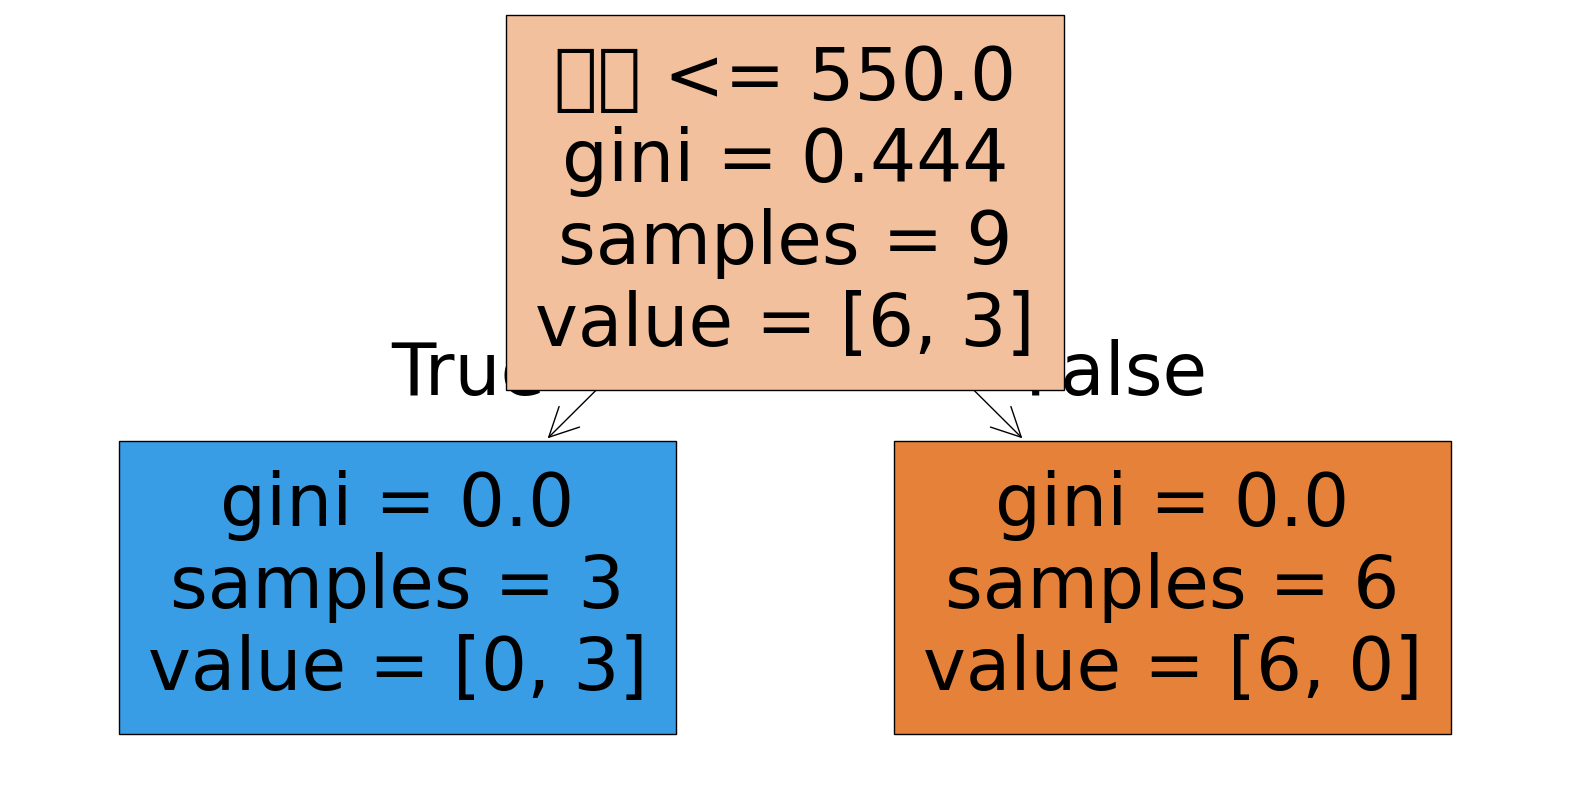

In [ ]:
#Step 5. 판단 과정을 그림으로 확인합니다.
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

from sklearn.tree import plot_tree
plt.figure( figsize=(20,10))
plot_tree(dt, max_depth=5 , filled=True ,
          feature_names=['무게','길이'] )

plt.show()